In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, fowlkes_mallows_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from Config import df

In [37]:
X = df[["S1", "C1","S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5"]]
y = df['CLASS']
X

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
...,...,...,...,...,...,...,...,...,...,...
1025005,3,1,1,12,2,9,4,9,2,6
1025006,3,3,4,5,2,7,1,4,4,3
1025007,1,11,4,7,3,9,1,13,2,7
1025008,3,11,1,8,1,1,3,13,2,8


In [38]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Decision Tree Classifier
print("---------- DecisionTreeClassifier ----------")
hands_fit = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred = hands_fit.predict(X_test)
scores = cross_val_score(hands_fit, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_pred))
fmi = fowlkes_mallows_score(y_test, y_pred)
print("Fowlkes-Mallows Index:", fmi)


---------- DecisionTreeClassifier ----------
Completado con una precisión de:  [0.62973044 0.56232622 0.64373518 0.63718403 0.65170584] 

              precision    recall  f1-score   support

           0       0.73      0.72      0.73    102428
           1       0.61      0.61      0.61     86945
           2       0.28      0.32      0.30      9691
           3       0.35      0.39      0.37      4352
           4       0.27      0.30      0.28       808
           5       0.12      0.18      0.14       405
           6       0.18      0.20      0.19       308
           7       0.14      0.13      0.13        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.64    205002
   macro avg       0.27      0.29      0.28    205002
weighted avg       0.65      0.64      0.65    205002

Fowlkes-Mallows Index: 0.5370886815285816


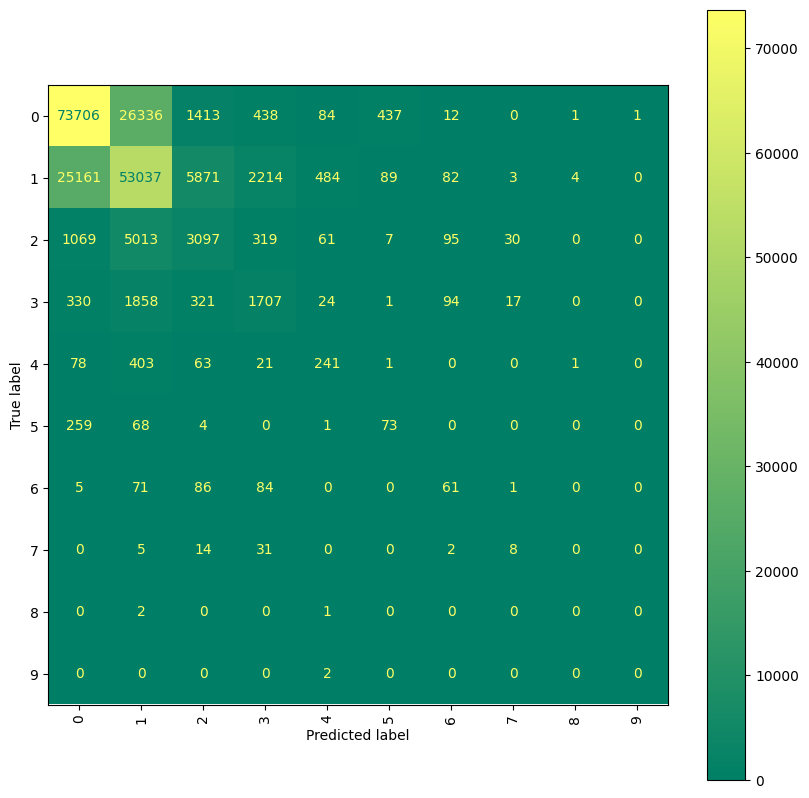

In [40]:
result_confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_display.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [41]:
# Random Forest Classifier
print("---------- RandomForestClassifier ----------")
fit = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_predV2 = fit.predict(X_test)
scores = cross_val_score(fit, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_predV2))
fmiV2 = fowlkes_mallows_score(y_test, y_predV2)
print("Fowlkes-Mallows Index:", fmiV2)

---------- RandomForestClassifier ----------


In [ ]:
result_confusion_matrixV2 = confusion_matrix(y_test, y_predV2)
cm_displayV2 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV2)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV2.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
# SVM Classifier
print("---------- SupportVectorMachine ----------")
svm_classifier = SVC(kernel='linear').fit(X_train, y_train)
y_predV3 = svm_classifier.predict(X_test)
scores = cross_val_score(svm_classifier, X, y, cv=5)
print("Completado con una precisión de: ", scores, "\n")
print(classification_report(y_test, y_predV3))
fmiV3 = fowlkes_mallows_score(y_test, y_predV3)
print("Fowlkes-Mallows Index:", fmiV3)

In [ ]:
result_confusion_matrixV3 = confusion_matrix(y_test, y_predV3)
cm_displayV3 = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrixV3)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = cm_displayV3.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()